ZOMATO DATA ANALYSIS PROJECT

Step 1 - Importing libraries required for analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 2 - Creating the Data Frame

In [4]:
Zomato_DF = pd.read_csv(r"C:\Users\SAGAVERM\Desktop\DA projects\Zomato EDA Project\Zomato data .csv")
print(Zomato_DF)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [5]:
Zomato_DF

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


Step 3 - Checking the data types of columns and converting it (if required)

In [6]:
Zomato_DF.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [7]:
#function to change the rate column value structre
def valueRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

#using apply method to pass in valueRate() function to remove the denominator for efficient analysis
Zomato_DF['rate'] = Zomato_DF['rate'].apply(valueRate)
Zomato_DF.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Step 4 - Checking for NULL values

In [8]:
Zomato_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


We have a complete dataframe, that has been cleaned and is ready to use for EDA (expolatory data analysis) to gain insights that benefit the company and the users.

1. Type of Restaurant

    To check the distribution of restaurants across different categories in the dataframe

In [9]:
Zomato_DF.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of restaurant')

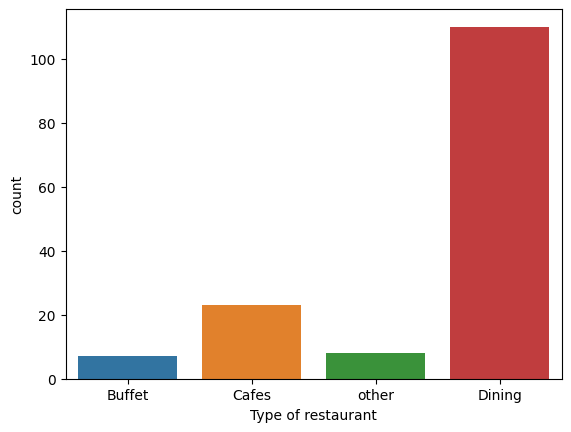

In [10]:
sns.countplot(data= Zomato_DF, x='listed_in(type)', hue= 'listed_in(type)')
plt.xlabel('Type of restaurant')

Conclusion - majority of the restaurants falls under dining category.

2. Distribution of votes across different types of restaurants

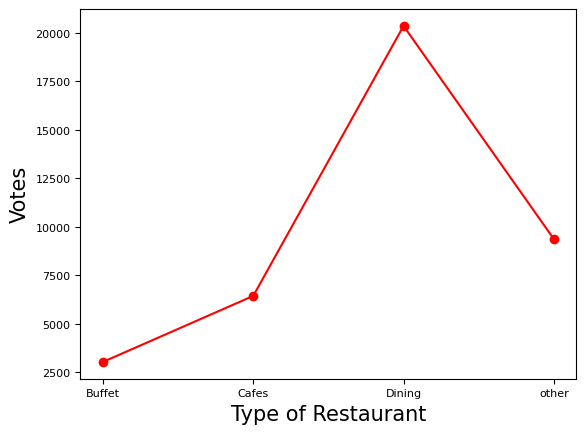

In [11]:
grouped_data = Zomato_DF.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c= 'r', marker = 'o')
plt.xlabel("Type of Restaurant", fontsize=15)
plt.ylabel('Votes', fontsize= 15)
plt.xticks(fontsize= 8)
plt.yticks(fontsize= 8)
plt.show()

Conclusion - Dinning restaurants have recieved maximum votes 

3. Ratings distribution across different types of restaurants

In [12]:
Zomato_DF.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


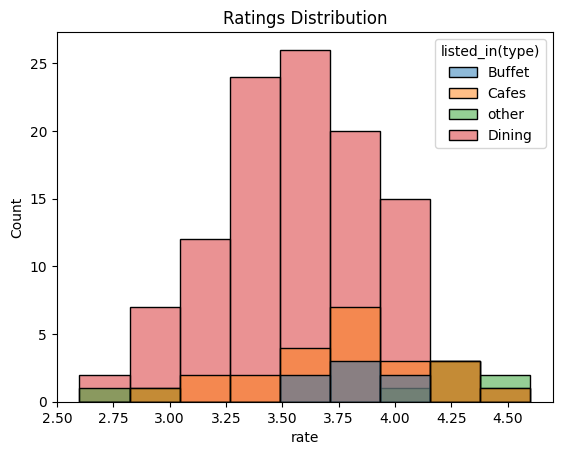

In [13]:
#histogram plot to check ratings and hue parameter to analyze distribution of ratings
sns.histplot(data= Zomato_DF, x= 'rate', hue= 'listed_in(type)')
plt.title('Ratings Distribution')
plt.show()

Conclusion - The majority restaurants recieved ratings from 3.25 to 4

4. Average order spending by couples

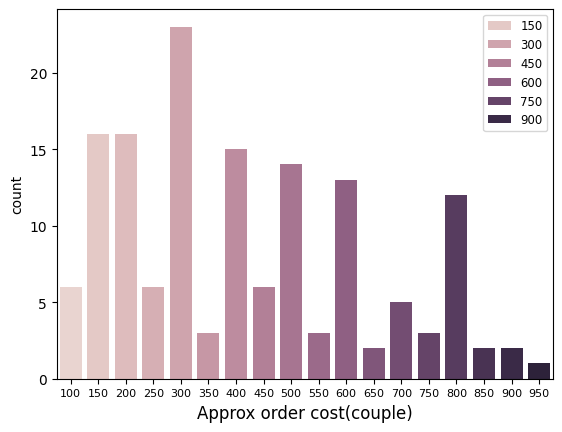

In [14]:
sns.countplot(data= Zomato_DF, x= 'approx_cost(for two people)', hue= 'approx_cost(for two people)', legend= True)
plt.legend(fontsize= 'small')
plt.xlabel('Approx order cost(couple)', fontsize=12)
plt.xticks(fontsize=8)
plt.show()

Conclusion - The majority of couples prefer restaurants with an approximate of 300 rupees

5. Which Order mode recieves maximum rating

In [15]:
Zomato_DF.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


We will be using a box plot to define the ratings difference between online order and offline/dining order

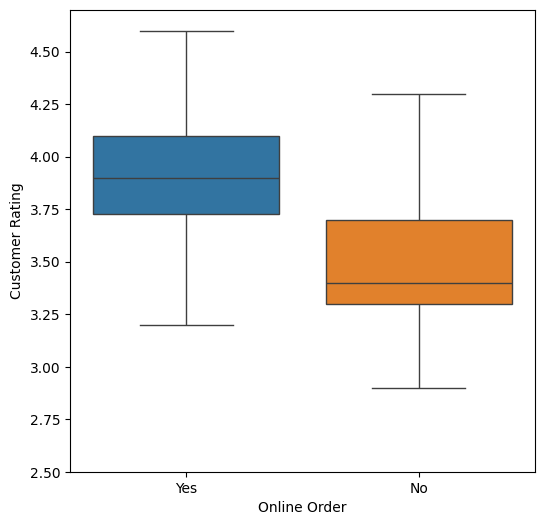

In [16]:
plt.figure(figsize= (6,6))
sns.boxplot(data= Zomato_DF, y= 'rate', x= 'online_order', hue= 'online_order', fliersize= 0)
plt.xlabel('Online Order')
plt.ylabel('Customer Rating')
plt.show()

Conclusion - Offline orders receive lower ratings in comparison to Online order

6.

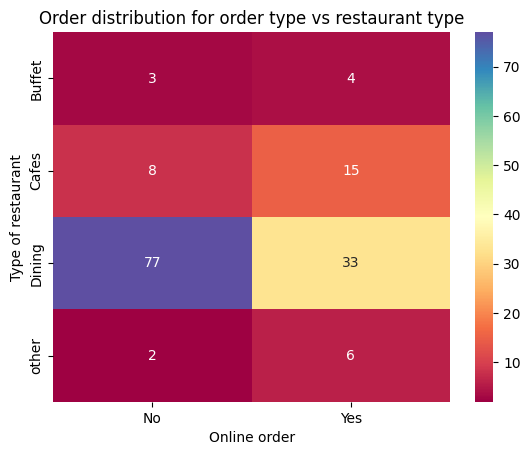

In [17]:
pivot_table = Zomato_DF.pivot_table(index= 'listed_in(type)', columns= 'online_order', aggfunc= 'size', fill_value=0)
sns.heatmap(data= pivot_table, annot= True, cmap= 'Spectral', fmt='d')
plt.title('Order distribution for order type vs restaurant type')
plt.xlabel('Online order')
plt.ylabel('Type of restaurant')
plt.show()

Conclusion - Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that users prefer to place orders in person at restaurants, but prefer online ordering at cafes.